In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
features = pd.read_csv('followers_network.emb', sep=' ',header=None,skiprows=1)
features.head()

,0,1,2,3,4,5,6,7,8
0,83123,-0.089480,0.287313,0.037381,-0.086290,0.017606,0.153309,-7.43790,-3.00175
1,83021,-0.242079,0.522871,0.049276,-0.174217,-0.051371,0.165846,-14.68750,-6.30435
2,83182,-0.126871,0.346095,0.050379,-0.100196,-0.005541,0.139762,-8.64112,-3.70515
3,300694,-0.157892,0.476201,0.115120,-0.142414,-0.023178,0.177524,-12.13670,-5.21520
4,83233,-0.118192,0.346991,0.019085,-0.111976,0.019113,0.139833,-9.16313,-3.89413


In [3]:
nodes = pd.read_csv('data/followers_network_nodes.csv', sep='\t')
nodes.head()

,id,content,type,id_node
0,1,gxgcollective,user,2964555295
1,2,1509346839.0,post,1636842385063323219
2,3,1509326008.0,post,1636667639059249501
3,4,1509235346.0,post,1635907116583816031
4,5,1509228990.0,post,1635853795965600449


In [4]:
data = nodes.merge(features, left_on='id', right_on=0)
data.head()

,id,content,type,id_node,0,1,2,3,4,5,6,7,8
0,1,gxgcollective,user,2964555295,1,-0.229455,0.520571,0.061099,0.012005,-0.007540,0.002119,-13.18140,-5.53508
1,2,1509346839.0,post,1636842385063323219,2,-0.121364,0.332531,0.003182,-0.034278,0.014136,-0.007582,-8.76922,-3.58587
2,3,1509326008.0,post,1636667639059249501,3,-0.115106,0.386999,0.027014,-0.058624,-0.010115,0.046046,-9.12418,-3.73533
3,4,1509235346.0,post,1635907116583816031,4,-0.089454,0.372458,-0.021936,-0.049437,-0.008397,-0.001251,-8.17561,-3.33155
4,5,1509228990.0,post,1635853795965600449,5,-0.082397,0.403253,-0.035011,-0.025134,-0.018710,0.026883,-8.42915,-3.39027


In [7]:
pca = PCA(n_components=2)
X_red = pca.fit_transform(data[range(1,9)])

In [8]:
data = pd.concat([data, pd.DataFrame(X_red, columns=['r1','r2'])], axis=1)

In [9]:
data.head()

,id,content,type,id_node,0,1,2,3,4,5,6,7,8,r1,r2
0,1,gxgcollective,user,2964555295,1,-0.229455,0.520571,0.061099,0.012005,-0.007540,0.002119,-13.18140,-5.53508,4.735209,0.173588
1,2,1509346839.0,post,1636842385063323219,2,-0.121364,0.332531,0.003182,-0.034278,0.014136,-0.007582,-8.76922,-3.58587,-0.090807,0.080864
2,3,1509326008.0,post,1636667639059249501,3,-0.115106,0.386999,0.027014,-0.058624,-0.010115,0.046046,-9.12418,-3.73533,0.295924,0.094238
3,4,1509235346.0,post,1635907116583816031,4,-0.089454,0.372458,-0.021936,-0.049437,-0.008397,-0.001251,-8.17561,-3.33155,-0.733841,0.055616
4,5,1509228990.0,post,1635853795965600449,5,-0.082397,0.403253,-0.035011,-0.025134,-0.018710,0.026883,-8.42915,-3.39027,-0.478449,0.108748


In [10]:
users = data[data['type'] == 'user']
tags = data[data['type'] == 'tag']
posts = data[data['type'] == 'post']

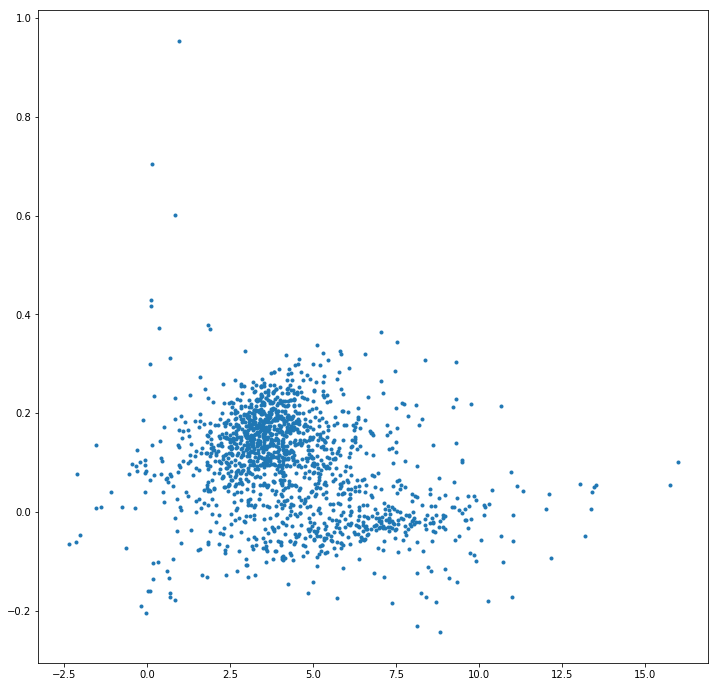

In [13]:
plt.figure(figsize=(12,12))
plt.scatter(users['r1'], users['r2'], marker='.')

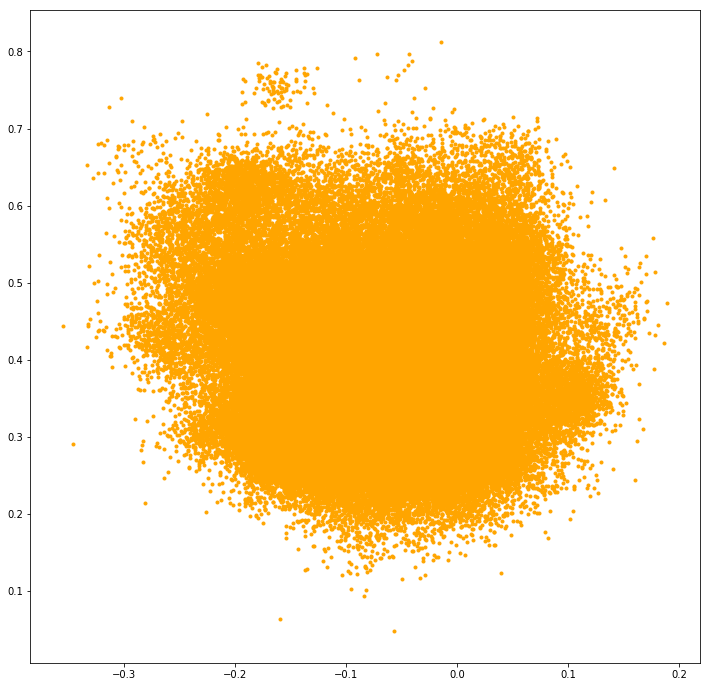

In [15]:
plt.figure(figsize=(12,12))
plt.scatter(posts[1], posts[2], marker='.', color='orange')

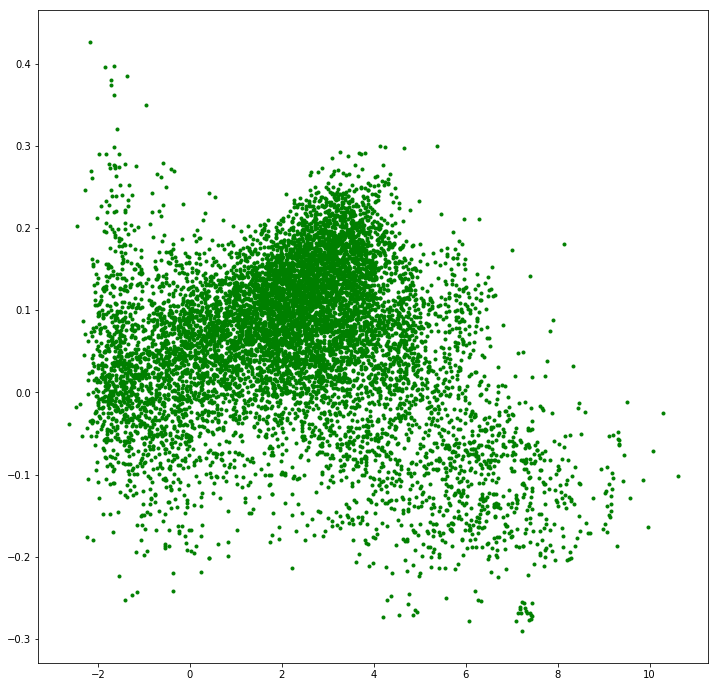

In [23]:
plt.figure(figsize=(12,12))
plt.scatter(tags['r1'], tags['r2'], marker='.', color='green')

In [31]:
tags.shape

(9203, 16)

In [16]:
def getSilCoeff(X, K):
    silhouette = []

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=17).fit(X)
        s = silhouette_score(X, kmeans.labels_)
        silhouette.append(s)

    return silhouette

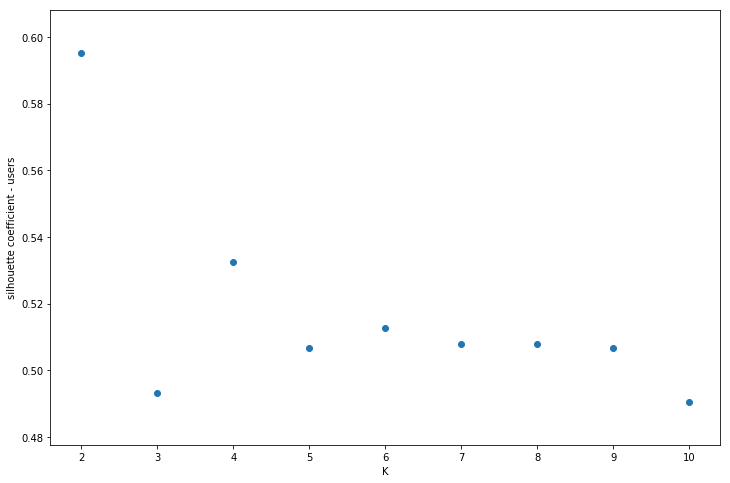

In [24]:
K = range(2, 11)
s = getSilCoeff(users[['r1','r2']], K)

plt.figure(figsize=(12,8))
plt.xlabel('K')
plt.ylabel('silhouette coefficient - users')
plt.scatter(K, s)

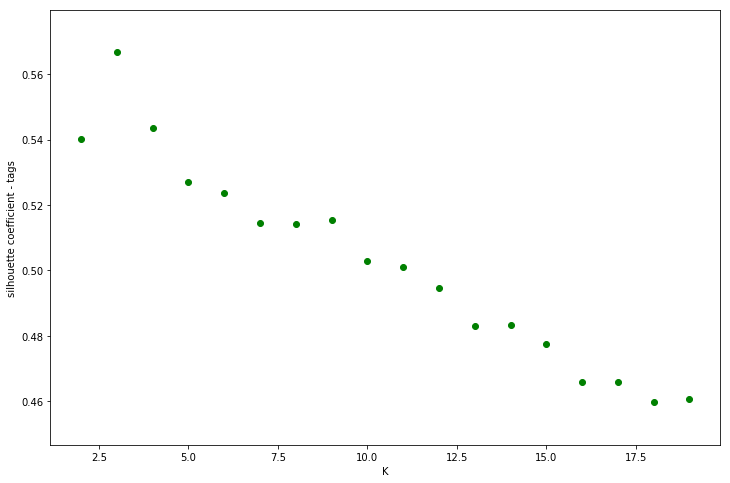

In [34]:
K = range(2, 20)
s = getSilCoeff(tags[['r1','r2']], K)

plt.figure(figsize=(12,8))
plt.xlabel('K')
plt.ylabel('silhouette coefficient - tags')
plt.scatter(K, s, color='green')

In [35]:
K_tag = 15
kmeans = KMeans(n_clusters=K_tag, random_state=17).fit(tags[['r1','r2']])

In [36]:
labels = kmeans.labels_

In [37]:
tags['cluster'] = labels
tags.head()

c:\python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,content,type,id_node,0,1,2,3,4,5,6,7,8,r1,r2,cluster
224423,224425,tasselearrings,tag,tasselearrings,224425,-0.079247,0.297446,-0.193793,-0.067403,0.169998,-0.029275,-9.53468,-4.02591,0.786836,0.047522,7
224424,224426,gxgcollective,tag,gxgcollective,224426,-0.196326,0.611275,0.026567,-0.056174,-0.036761,0.062197,-13.02410,-5.40422,4.541770,0.223892,9
224425,224427,australianbrand,tag,australianbrand,224427,-0.229540,0.509490,0.040783,0.028971,-0.001216,0.045330,-12.72520,-5.35129,4.243833,0.153646,8
224426,224428,wanderlust,tag,wanderlust,224428,-0.055092,0.655495,-0.002203,-0.074998,-0.051225,-0.010861,-11.82150,-4.86713,3.227761,0.189122,5
224427,224431,turquoise,tag,turquoise,224431,-0.126022,0.378803,-0.011614,-0.065322,0.079338,-0.062738,-10.42750,-4.32490,1.724994,0.120986,3


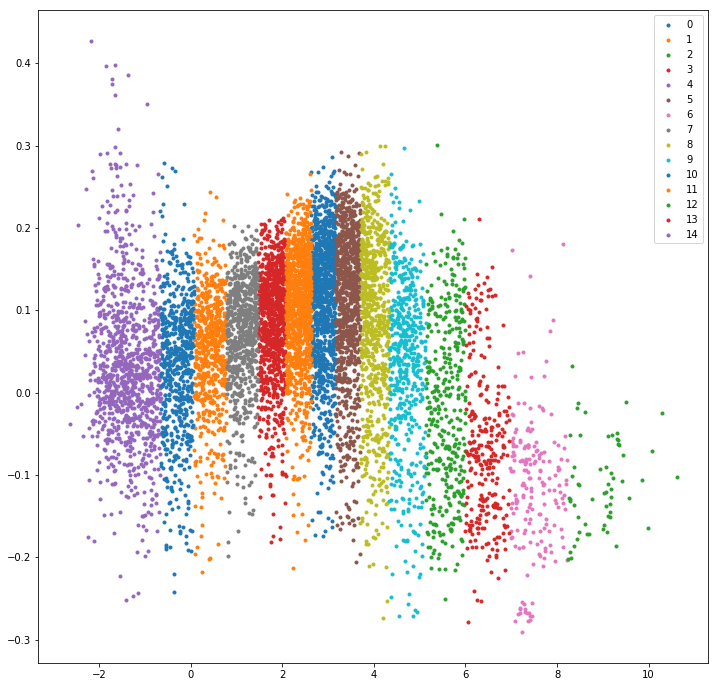

In [42]:
plt.figure(figsize=(12,12))
for c in range(K_tag):
    cluster = tags[tags['cluster'] == c]
    plt.scatter(cluster['r1'], cluster['r2'], marker='.', label=c)
plt.legend()

In [39]:
for c in range(K_tag):
    cluster = tags[tags['cluster'] == c]
    print c, cluster.shape[0]

0 1057
1 619
2 376
3 976
4 504
5 931
6 185
7 709
8 756
9 529
10 628
11 1042
12 59
13 279
14 553
